In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city using latitude and longitude

from citipy import citipy

# CSV File

output_data_file = "data/cities.csv"

# Latitude/Longitude range

lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
# Empty lists for holding lat/lng coordinates and cities

lat_lngs = []
cities = []

# Random lat/lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities) 

624

In [17]:
# Base URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# Empty ist for holding the city data

cities_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_counts = 1
set_counts = 1

# Loop through all the cities in the list

for i, city in enumerate(cities):
        
    # Group cities in order to log them
    
    if (i % 50 == 0 and i >= 50):
        set_counts += 1
        record_counts = 0

    # Create unique URL for each city
    
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        
        # Retrieve data from JSON
        
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        
        cities_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 51 of Set 1 | hami
Processing Record 52 of Set 1 | mataura
Processing Record 53 of Set 1 | tasiilaq
Processing Record 54 of Set 1 | richards bay
Processing Record 55 of Set 1 | port alfred
Processing Record 56 of Set 1 | busselton
Processing Record 57 of Set 1 | caravelas
Processing Record 58 of Set 1 | barrow
Processing Record 59 of Set 1 | castro
Processing Record 60 of Set 1 | alofi
Processing Record 61 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 62 of Set 1 | hobart
Processing Record 63 of Set 1 | ambilobe
Processing Record 64 of Set 1 | monrovia
Processing Record 65 of Set 1 | broome
Processing Record 66 of Set 1 | buala
Processing Record 67 of Set 1 | zyryanka
Processing Record 68 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 69 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 70 of Set 1 | butaritari
Processing Record 71 of Set 1 | orocue

Processing Record 233 of Set 1 | srednekolymsk
Processing Record 234 of Set 1 | san cristobal
Processing Record 235 of Set 1 | dinguiraye
Processing Record 236 of Set 1 | chikoy
City not found. Skipping...
Processing Record 237 of Set 1 | mackay
Processing Record 238 of Set 1 | kahului
Processing Record 239 of Set 1 | alyangula
Processing Record 240 of Set 1 | vila franca do campo
Processing Record 241 of Set 1 | santarem
Processing Record 242 of Set 1 | gallup
Processing Record 243 of Set 1 | islamkot
Processing Record 244 of Set 1 | carutapera
Processing Record 245 of Set 1 | northam
Processing Record 246 of Set 1 | ahuimanu
Processing Record 247 of Set 1 | fare
Processing Record 248 of Set 1 | mao
Processing Record 249 of Set 1 | arraial do cabo
Processing Record 250 of Set 1 | mandla
Processing Record 251 of Set 1 | sol-iletsk
Processing Record 252 of Set 1 | baoqing
Processing Record 253 of Set 1 | narsaq
Processing Record 254 of Set 1 | rozkishne
Processing Record 255 of Set 1 | 

Processing Record 419 of Set 1 | praia da vitoria
Processing Record 420 of Set 1 | copacabana
Processing Record 421 of Set 1 | labuhan
Processing Record 422 of Set 1 | lolua
City not found. Skipping...
Processing Record 423 of Set 1 | westport
Processing Record 424 of Set 1 | potrerillos
Processing Record 425 of Set 1 | bandarbeyla
Processing Record 426 of Set 1 | san mateo
Processing Record 427 of Set 1 | morris
Processing Record 428 of Set 1 | lebu
Processing Record 429 of Set 1 | berezovyy
Processing Record 430 of Set 1 | jumla
Processing Record 431 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 432 of Set 1 | san jose
Processing Record 433 of Set 1 | krasnoselkup
Processing Record 434 of Set 1 | talara
Processing Record 435 of Set 1 | buri
Processing Record 436 of Set 1 | balaguer
Processing Record 437 of Set 1 | ajdabiya
Processing Record 438 of Set 1 | ler
Processing Record 439 of Set 1 | hede
Processing Record 440 of Set 1 | manggar
Processing Record 441 of 

Processing Record 602 of Set 1 | altay
Processing Record 603 of Set 1 | loandjili
Processing Record 604 of Set 1 | rantoul
Processing Record 605 of Set 1 | corn island
Processing Record 606 of Set 1 | penzance
Processing Record 607 of Set 1 | cabo san lucas
Processing Record 608 of Set 1 | esperance
Processing Record 609 of Set 1 | pisco
Processing Record 610 of Set 1 | nizhniy kuranakh
Processing Record 611 of Set 1 | sauda
Processing Record 612 of Set 1 | egvekinot
Processing Record 613 of Set 1 | awjilah
Processing Record 614 of Set 1 | avila
Processing Record 615 of Set 1 | russkaya polyana
Processing Record 616 of Set 1 | gazi
Processing Record 617 of Set 1 | agutaya
Processing Record 618 of Set 1 | belmonte
Processing Record 619 of Set 1 | verkhnyaya inta
Processing Record 620 of Set 1 | aanekoski
Processing Record 621 of Set 1 | elyria
Processing Record 622 of Set 1 | owando
Processing Record 623 of Set 1 | batsfjord
Processing Record 624 of Set 1 | debre sina
Processing Record 

In [18]:
 # Convert array of JSONs into Pandas DataFrame
    
cities_data_df = pd.DataFrame(city_data)

# Show Record Count

cities_data_df.count()

City          45
Lat           45
Lng           45
Max Temp      45
Humidity      45
Cloudiness    45
Wind Speed    45
Country       45
Date          45
dtype: int64

In [20]:
 # Display the City Data Frame (head)
    
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mao,39.8885,4.2658,57.76,88,20,2.30,ES,1635378382
1,barrow,71.2906,-156.7887,21.22,86,90,4.61,US,1635378382
2,vao,-22.6667,167.4833,72.45,85,14,14.74,NC,1635378383
3,warmbad,-28.4500,18.7333,71.01,57,100,8.14,NA,1635378383
4,hobart,-42.8794,147.3294,70.02,62,26,1.99,AU,1635378302


In [23]:
# Display the City Data Frame (head)

cities_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
40,esperance,-33.8667,121.9000,51.64,65,88,22.35,AU,1635378396
41,marsh harbour,26.5412,-77.0636,79.25,62,39,11.77,BS,1635378397
42,shetpe,44.1667,52.1167,37.40,58,0,6.87,KZ,1635378397
43,novobohdanivka,47.0819,35.3272,39.27,62,0,4.54,UA,1635378398
44,mahebourg,-20.4081,57.7000,71.26,88,40,5.75,MU,1635378399


In [24]:
cities_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,16.210900,15.443547,53.916444,76.311111,52.755556,8.791333,1.635378e+09
std,41.106055,101.355233,22.997476,15.560472,41.024469,5.517168,6.908638e+01
min,-53.150000,-175.200000,2.390000,28.000000,0.000000,1.010000,1.635378e+09
25%,-23.120300,-70.916700,40.440000,66.000000,14.000000,4.970000,1.635378e+09
50%,26.002300,27.911600,56.730000,78.000000,66.000000,8.050000,1.635378e+09
75%,50.678900,102.500000,71.260000,88.000000,94.000000,11.770000,1.635378e+09
max,77.484000,170.313300,85.300000,98.000000,100.000000,25.080000,1.635378e+09


In [87]:
 # Get all of the cities with humidity greater than or equal to 100
    
humid_cities_data = cities_data_df[(cities_data_df["Humidity"] >= 100)].index
                                  
humid_cities_data

Int64Index([], dtype='int64')

In [30]:
 # Make a new DataFrame equal to the original city data, dropping all of the humidity outliers
    
cleaned_cities_data_df = cities_data_df.drop(humid_cities_data, inplace=False)
cleaned_cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mao,39.8885,4.2658,57.76,88,20,2.30,ES,1635378382
1,barrow,71.2906,-156.7887,21.22,86,90,4.61,US,1635378382
2,vao,-22.6667,167.4833,72.45,85,14,14.74,NC,1635378383
3,warmbad,-28.4500,18.7333,71.01,57,100,8.14,NA,1635378383
4,hobart,-42.8794,147.3294,70.02,62,26,1.99,AU,1635378302


In [38]:
# Extract relevant fields from the data frame

lats = cleaned_cities_data_df["Lat"]
cloudiness = cleaned_cities_data_df["Cloudiness"]
wind_speeds = cleaned_cities_data_df["Wind Speed"]
max_temps = cleaned_cities_data_df["Max Temp"]
humidity = cleaned_cities_data_df["Humidity"]

# Export the City_Data into a csv

cleaned_cities_data_df.to_csv(output_data_file, index_label="City_ID")

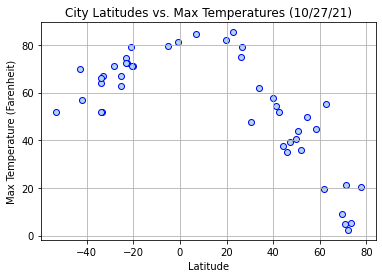

In [59]:
# Build a scatter plot for latitude compared to temperature, using Matplotlib
plt.scatter(lats, 
            max_temps,
            color = "lightblue",
            edgecolor="blue", 
            linewidths=1, 
            marker="o", 
            alpha=1, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitudes vs. Max Temperatures (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("data/Figure_1_pythonAPI.png")

# Show plot
plt.show()

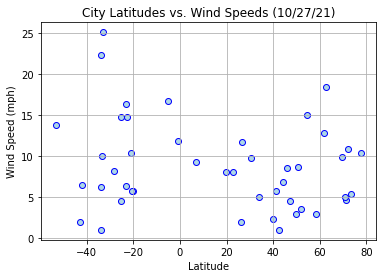

In [63]:
 # Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speeds,
            color="lightblue",
            edgecolor="blue", 
            linewidths=1, 
            marker="o", 
            alpha=1, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitudes vs. Wind Speeds (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("data/Figure_2_pythonAPI.png")

# Show plot
plt.show()

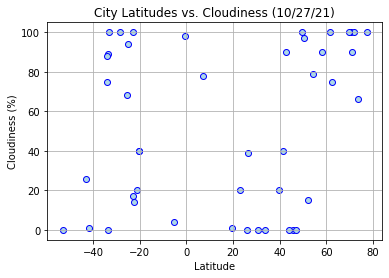

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            color="lightblue",
            edgecolor="blue",
            linewidths=1, 
            marker="o", 
            alpha=1,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitudes vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("data/Figure_3_pythonAPI.png")

# Show plot
plt.show()

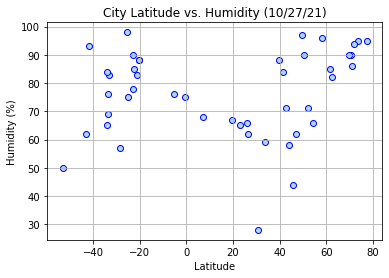

In [62]:
 # Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            color="lightblue",
            edgecolor="blue",
            linewidths=1,
            marker="o", 
            alpha=1,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("data/Figure_4_pythonAPI.png")

# Show plot
plt.show()